In [1]:
import os
import re
from typing import List, Tuple
from collections import defaultdict, Counter

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
def read_corpus(filepath: str) -> List[List[Tuple[str]]]:
    output = []
    
    with open(filepath, 'r') as f:
        for sentence in re.split(r'\n\n+', f.read()):
            if not sentence:
                continue
            
            output.append([])
            for token in sentence.split('\n'):
                if token.startswith('#') or not token:
                    continue
                    
                output[-1].append(tuple(token.split('\t')))
    
    assert all(len(token) == 10 for sentence in output for token in sentence)
    assert all(len(sentence) > 0 for sentence in output)
    
    return output

In [3]:
corpus = []

for filename in os.listdir('../data/UD_Chinese-GSD'):
    if not filename.endswith('.conllu'):
        continue
    
    print(filename)
    corpus.extend(read_corpus('../data/UD_Chinese-GSD/' + filename))

zh_gsd-ud-train.conllu
zh_gsd-ud-test.conllu
zh_gsd-ud-dev.conllu


- Количество размеченных предложений и токенов

In [4]:
len(corpus)

4997

In [5]:
num_tokens = sum(len(sentence) for sentence in corpus)
num_tokens

123291

- Количество уникальных символов

In [6]:
num_chars = len(set([char for sentence in corpus for token in sentence for char in token[1]]))
num_chars

3740

- В каком проценте случаев лемма совпадает с токеном

In [7]:
count = 0

for sentence in corpus:
    for token in sentence:
        if token[1] == token[2]:
            count += 1
print(f'В {count / num_tokens * 100:.2f}% случаев лемма совпадает с токеном.')

В 99.81% случаев лемма совпадает с токеном.


In [8]:
sentence_lengths, token_lengths, upos, rel_types = [], [], [], []

In [9]:
for sentence in corpus:
    sentence_lengths.append(len(sentence))
    for token in sentence:
        token_lengths.append(len(token[1]))
        upos.append(token[3])
        rel_types.append(token[7])

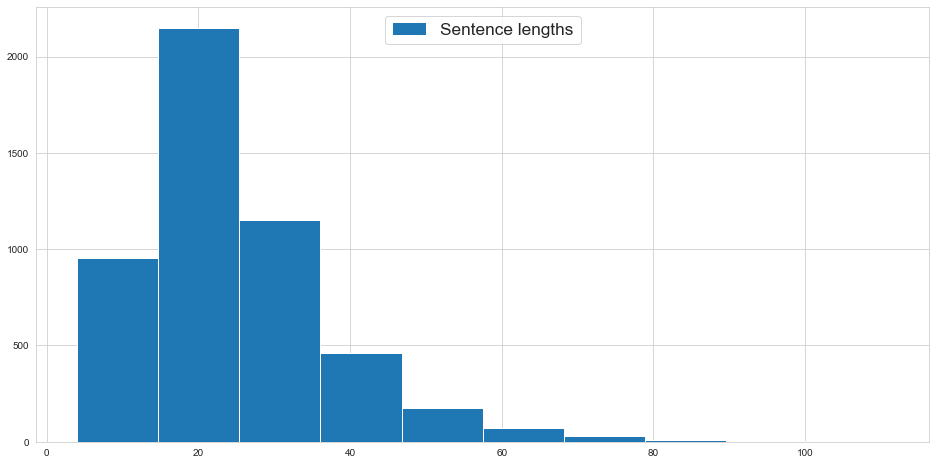

In [10]:
plt.figure(figsize=(16, 8))
plt.hist(sentence_lengths)
plt.legend(['Sentence lengths'], loc='upper center', fontsize='xx-large')
plt.show()

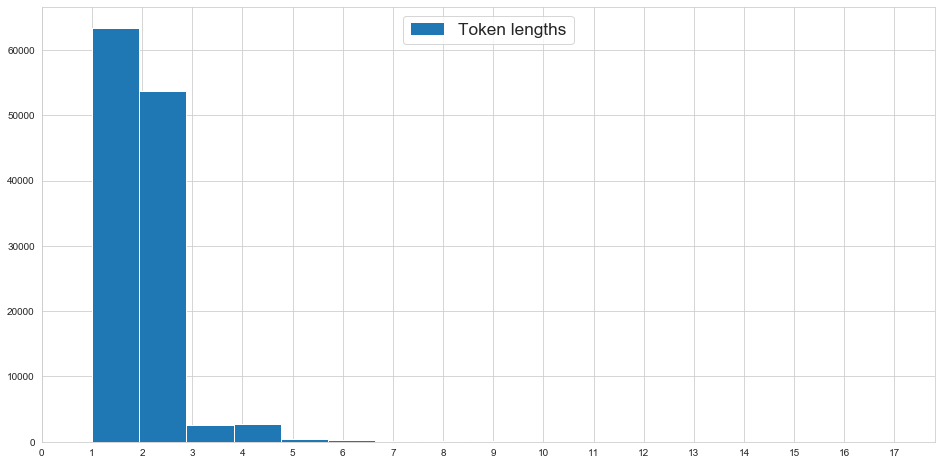

In [11]:
plt.figure(figsize=(16, 8))
plt.hist(token_lengths, bins=max(token_lengths))
plt.xticks(list(range(max(token_lengths) + 1)))
plt.legend(['Token lengths'], loc='upper center', fontsize='xx-large')
plt.show()

In [12]:
upos_counts = Counter(upos)

[upos for upos, count in upos_counts.items() if count < 300]

['SYM']

In [13]:
', '.join(sorted(set(upos), key=lambda x: upos_counts[x], reverse=True))

'NOUN, VERB, PUNCT, PART, PROPN, NUM, ADV, ADP, ADJ, AUX, PRON, CCONJ, DET, X, SYM'

In [14]:
rel_counts = Counter(rel_types)

[rel for rel, count in rel_counts.items() if count < 300]

['iobj',
 'discourse',
 'nsubj:pass',
 'csubj:pass',
 'obl:patient',
 'dislocated',
 'mark:advb',
 'mark:comp',
 'reparandum',
 'vocative',
 'case:suff',
 'orphan']

In [15]:
', '.join(sorted(set(rel_types), key=lambda x: rel_counts[x], reverse=True))

'punct, nmod, nsubj, obj, nummod, compound, root, mark, advcl, advmod, case, case:dec, conj, obl, mark:relcl, parataxis, clf, ccomp, amod, acl, cop, acl:relcl, xcomp, cc, det, nmod:tmod, appos, flat:name, case:aspect, aux, case:pref, aux:pass, csubj, flat:foreign, nsubj:pass, obl:patient, discourse, mark:advb, iobj, dislocated, mark:comp, csubj:pass, reparandum, orphan, vocative, case:suff'

In [16]:
rel2pos = defaultdict(list)

for sentence in corpus:
    for token in sentence:
        if token[7] == 'root':
            continue
            
        rel2pos[token[7]].append(sentence[int(token[6]) - 1][3])

In [17]:
for key, value in rel2pos.items():
    counts = Counter(value)
    max_count = max(counts.items(), key = lambda x: x[1])
    if max_count[1] / sum(counts.values()) >= 0.9:
        print(f'{key}: {max_count[0]}')

advcl: VERB
obj: VERB
xcomp: VERB
mark: VERB
case:aspect: VERB
iobj: VERB
nmod:tmod: VERB
ccomp: VERB
compound: PART
det: NOUN
clf: NOUN
nummod: NOUN
obl: VERB
aux: VERB
nsubj:pass: VERB
aux:pass: VERB
flat:name: PROPN
csubj:pass: VERB
obl:patient: VERB
flat:foreign: X
vocative: VERB
case:suff: VERB
orphan: NOUN
